In [53]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns





import warnings
warnings.filterwarnings('ignore')

In [54]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
data.shape

(768, 9)

In [59]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


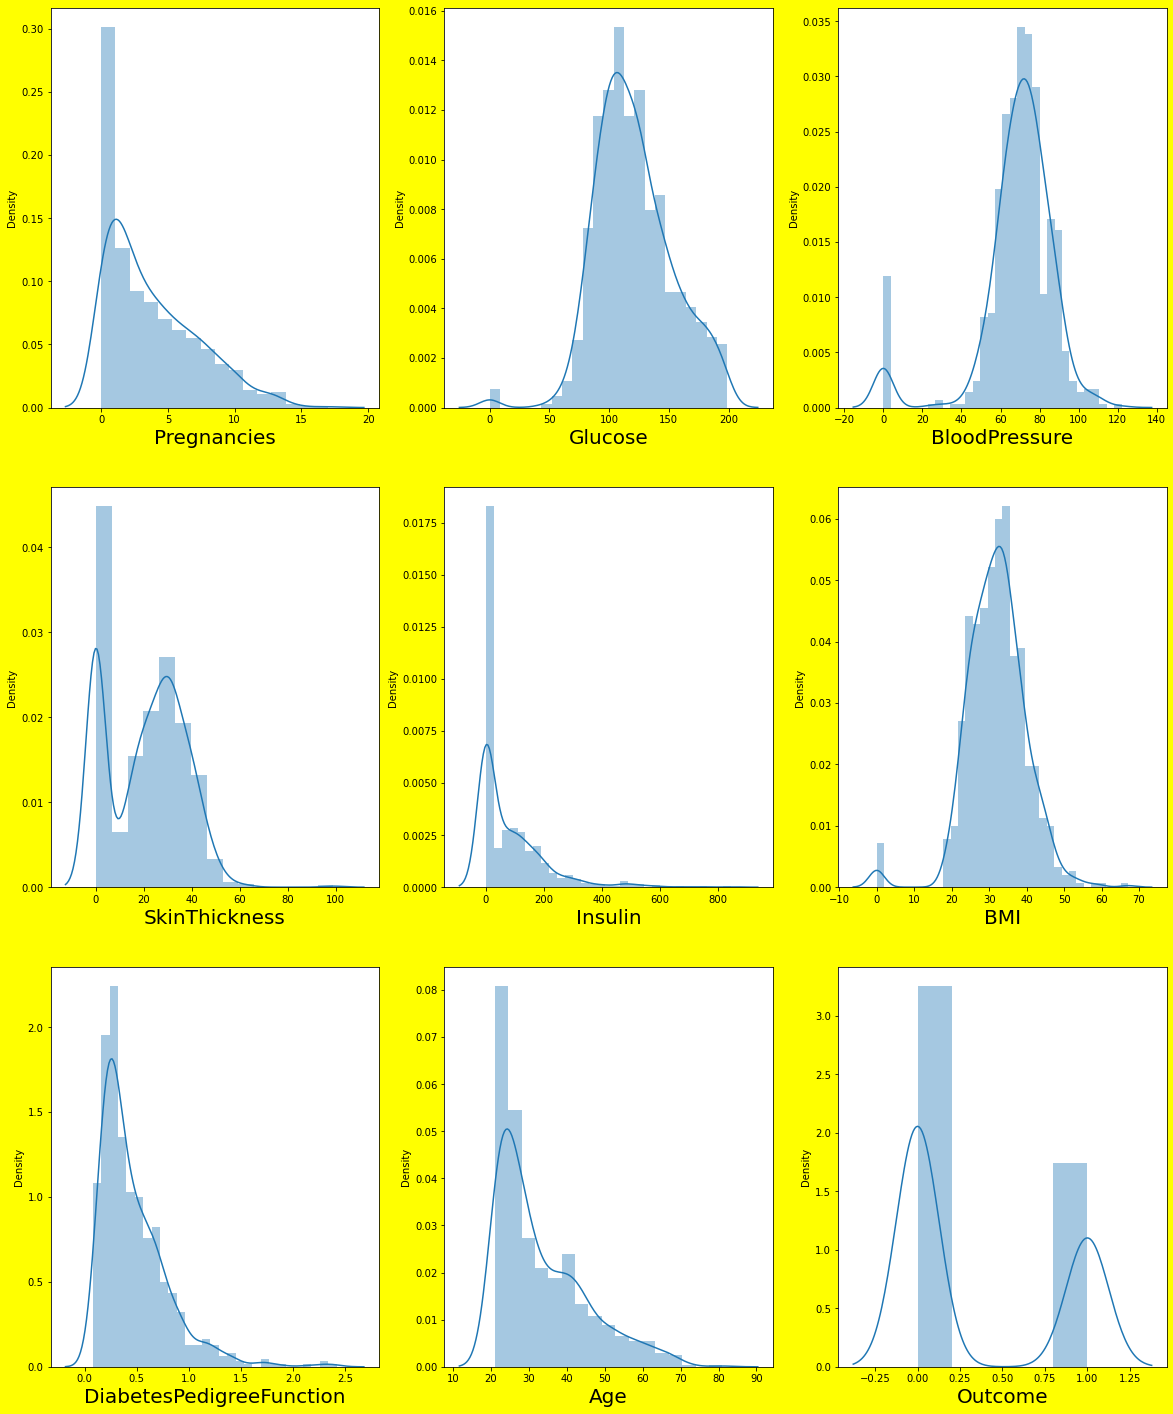

In [60]:
# Let's see how data is distributed for every column
plt.figure(figsize=(20,25),facecolor = 'yellow')
plotnumber = 1


for column in data:
    if plotnumber<= 9:   #as there are 9 column in data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
        
    plotnumber+=1
     
        
plt.show()

In [61]:
#Replacing 0 values with mean of the column

data['BMI'] =data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] =data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] =data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] =data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] =data['SkinThickness'].replace(0,data['SkinThickness'].mean())

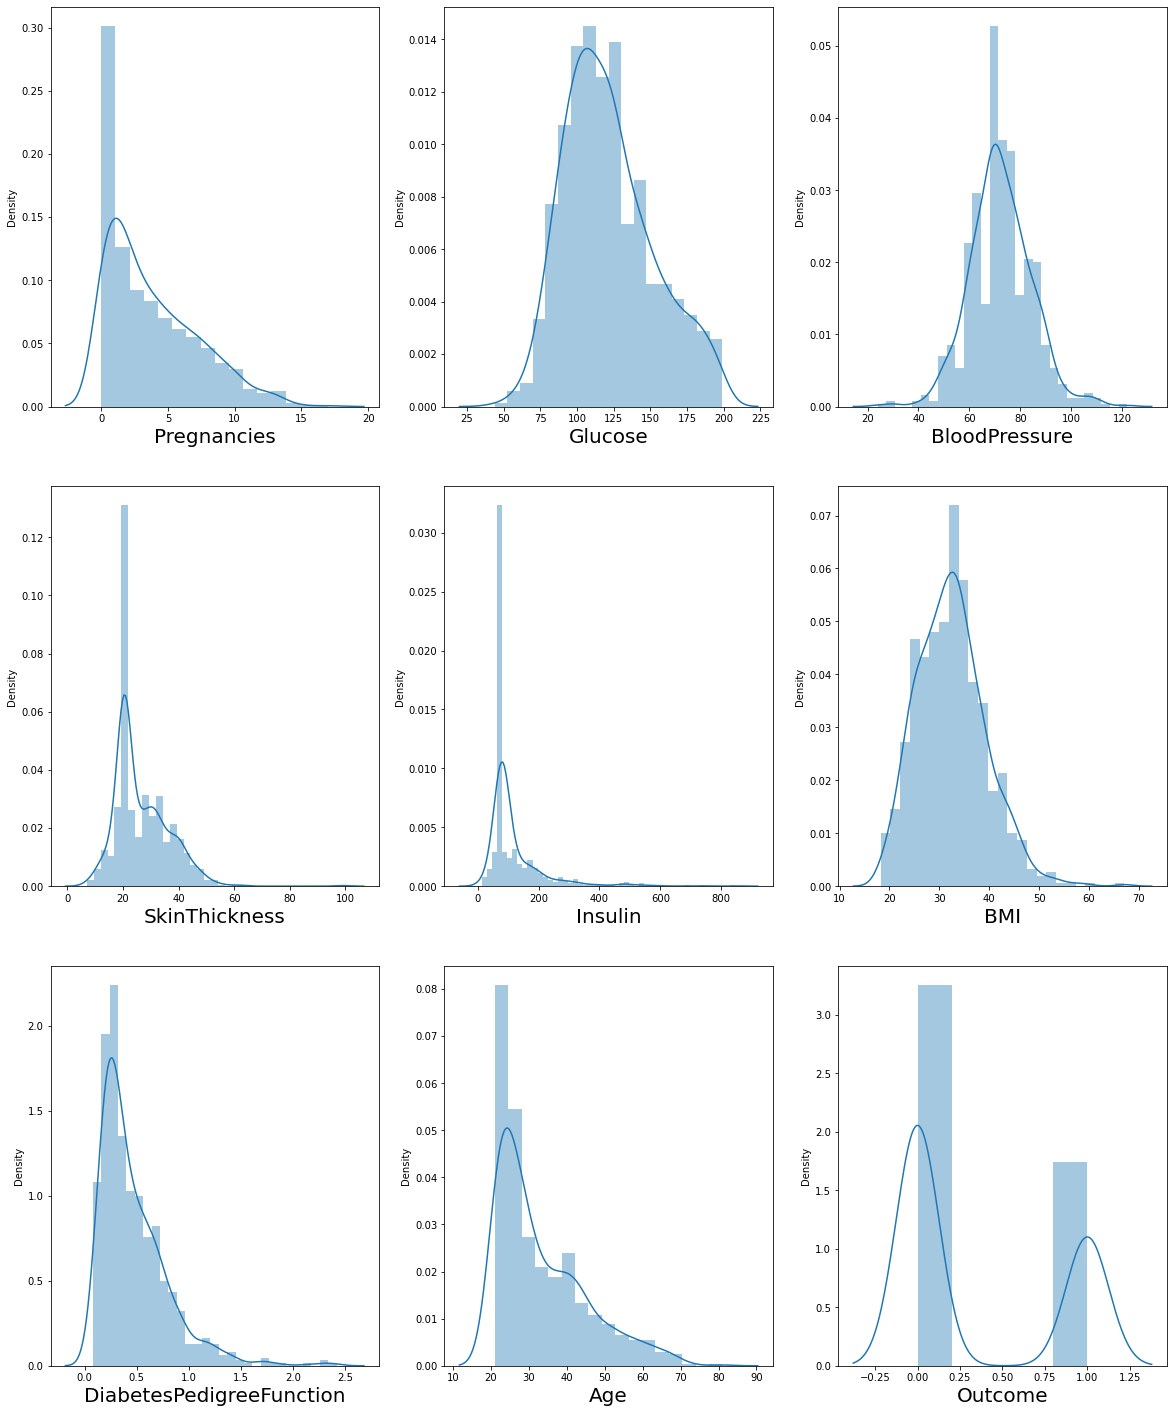

In [62]:
plt.figure(figsize=(20,25))
plotnumber = 1


for column in data:
    if plotnumber<= 9:   
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
        
    plotnumber+=1
     
        
plt.show()

In [65]:
df_features = data.drop('Outcome', axis = 1)

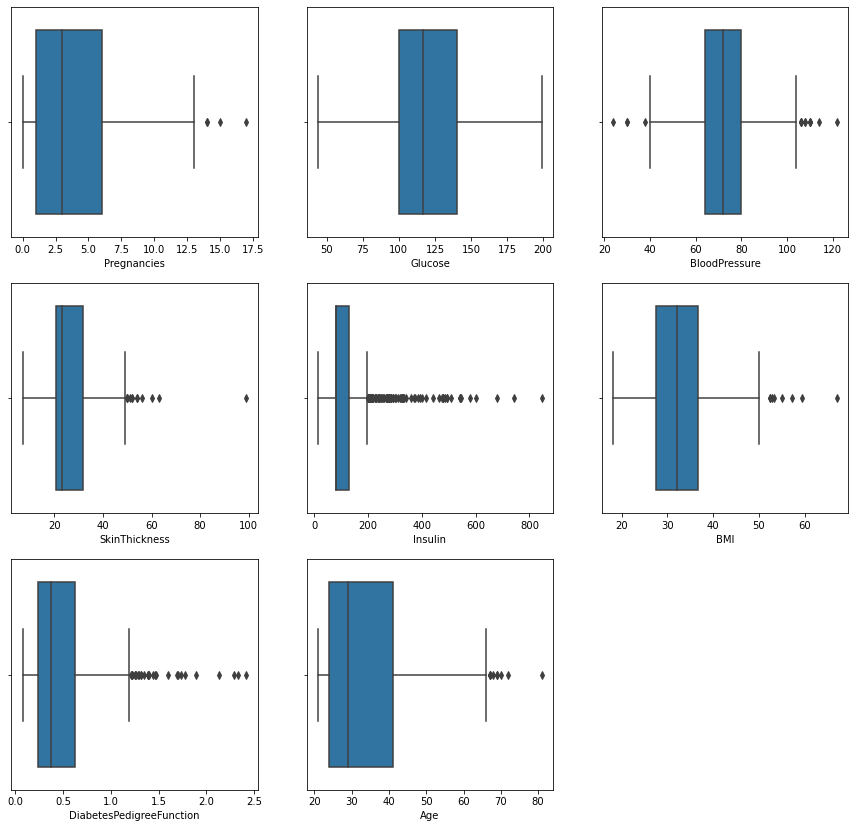

In [66]:
#Visualize the outliers by boxplot
plt.figure(figsize=(15,50))
graph = 1


for column in df_features:
    if graph<= 30:   
        ax = plt.subplot(10,3,graph)
        sns.boxplot(df_features[column], orient = 'v')
        plt.xlabel(column,fontsize = 10)
        
        
    graph+=1
     
        
plt.show()

In [67]:
data.shape

(768, 9)

In [68]:
#Find IQR (inter quantile range) to identify outliers

# 1st Quantile
q1 = data.quantile(0.25)

#3rd Quantile
q3 = data.quantile(0.75)

#IQR

iqr = q3-q1

In [69]:
#Validating one outlier

preg_high = (q3.Pregnancies + (1.5*iqr.Pregnancies))
preg_high

13.5

In [70]:
#Check the indexes which have higher values
index = np.where(data['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [71]:
# Drop the index which we found in the above cell
data = data.drop(data.index[index])
data.shape


(764, 9)

In [72]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [73]:
bp_high = (q3.BloodPressure + (1.5*iqr.BloodPressure))
print(bp_high)

index = np.where(data['BloodPressure']>bp_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [74]:
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [75]:
st_high = (q3.SkinThickness + (1.5*iqr.SkinThickness))
print(st_high)

index = np.where(data['SkinThickness']>st_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [76]:
insu_high = (q3.Insulin + (1.5*iqr.Insulin))
print(insu_high)

index = np.where(data['Insulin']>insu_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [77]:
bmi_high = (q3.BMI + (1.5*iqr.BMI))
print(bmi_high)

index = np.where(data['BMI']>bmi_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [78]:
age_high = (q3.Age + (1.5*iqr.Age))
print(age_high)

index = np.where(data['Age']>age_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

66.5
(645, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
640,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
641,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
642,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
643,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [79]:
bp_low = (q1.BloodPressure + (1.5*iqr.BloodPressure))
print(bp_low)

index = np.where(data['BloodPressure']<bp_low)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

88.0
(63, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,9,8,125.0,96.0,20.536458,79.799479,31.992578,0.232,54,1
1,10,4,110.0,92.0,20.536458,79.799479,37.600000,0.191,30,0
2,22,7,196.0,90.0,20.536458,79.799479,39.800000,0.451,41,1
3,24,11,143.0,94.0,33.000000,146.000000,36.600000,0.254,51,1
4,29,5,117.0,92.0,20.536458,79.799479,34.100000,0.337,38,0
...,...,...,...,...,...,...,...,...,...,...
58,744,13,153.0,88.0,37.000000,140.000000,40.600000,1.174,39,0
59,746,1,147.0,94.0,41.000000,79.799479,49.300000,0.358,27,1
60,755,1,128.0,88.0,39.000000,110.000000,36.500000,1.057,37,1
61,756,7,137.0,90.0,41.000000,79.799479,32.000000,0.391,39,0


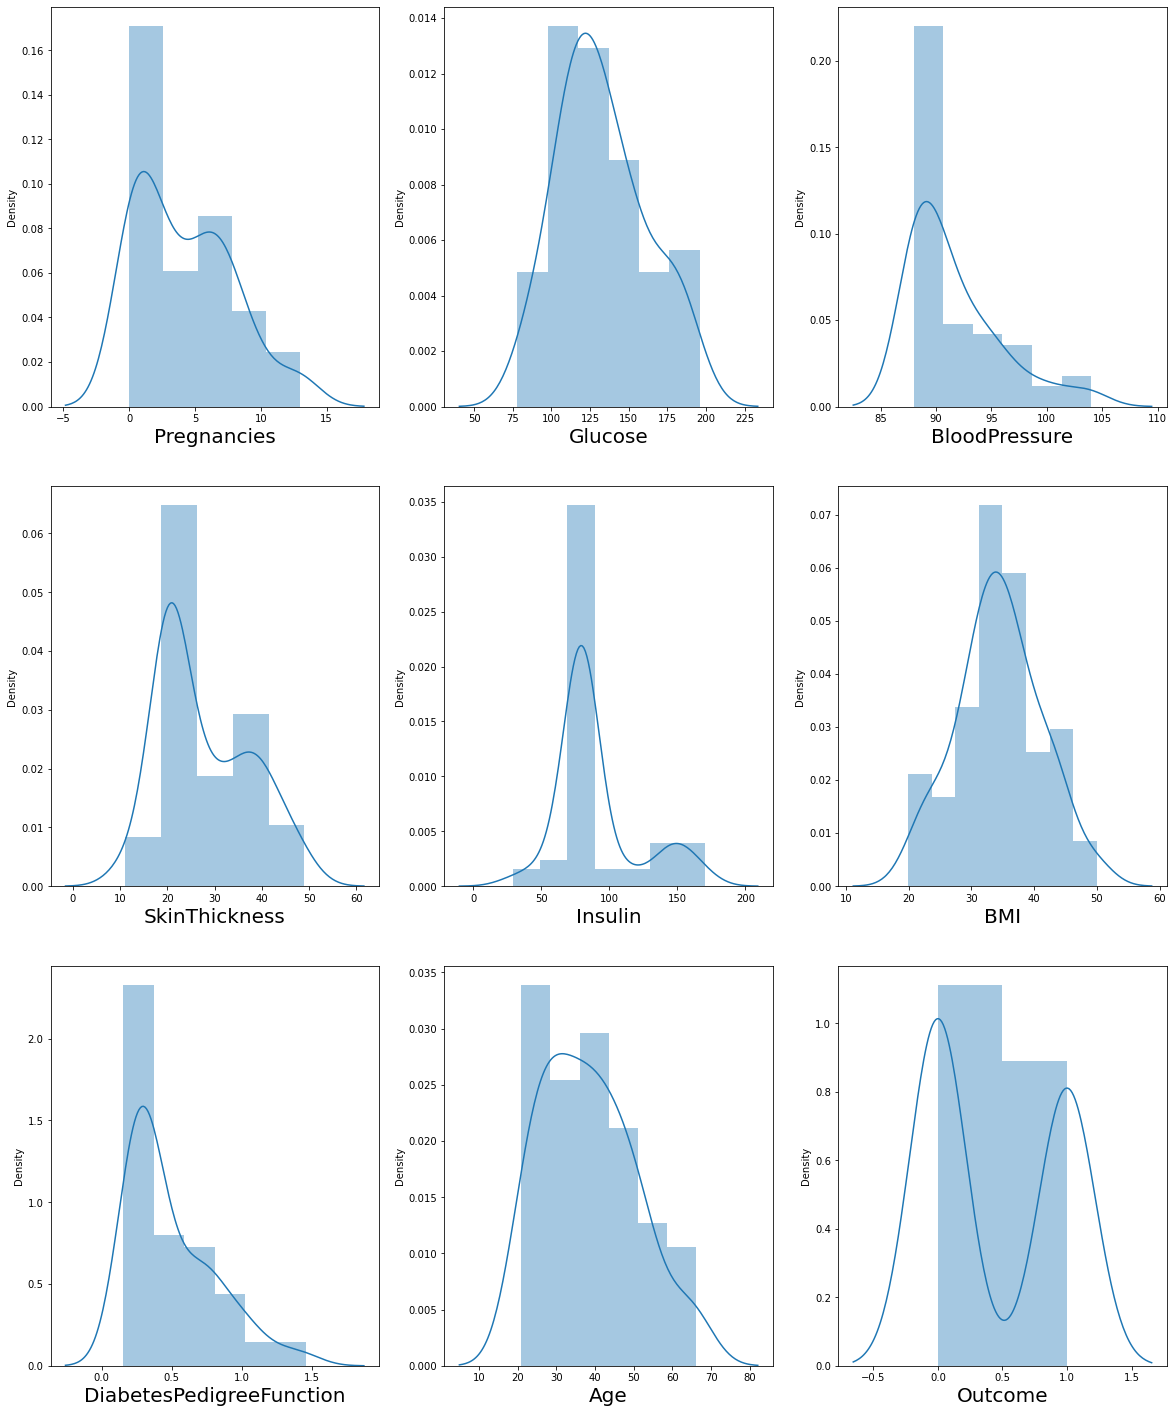

In [80]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnumber = 1


for column in data:
    if plotnumber<= 9:   
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
        
        
    plotnumber+=1
     
        
plt.show()

In [81]:
x = data.drop(columns =['Outcome'])
y = data['Outcome']

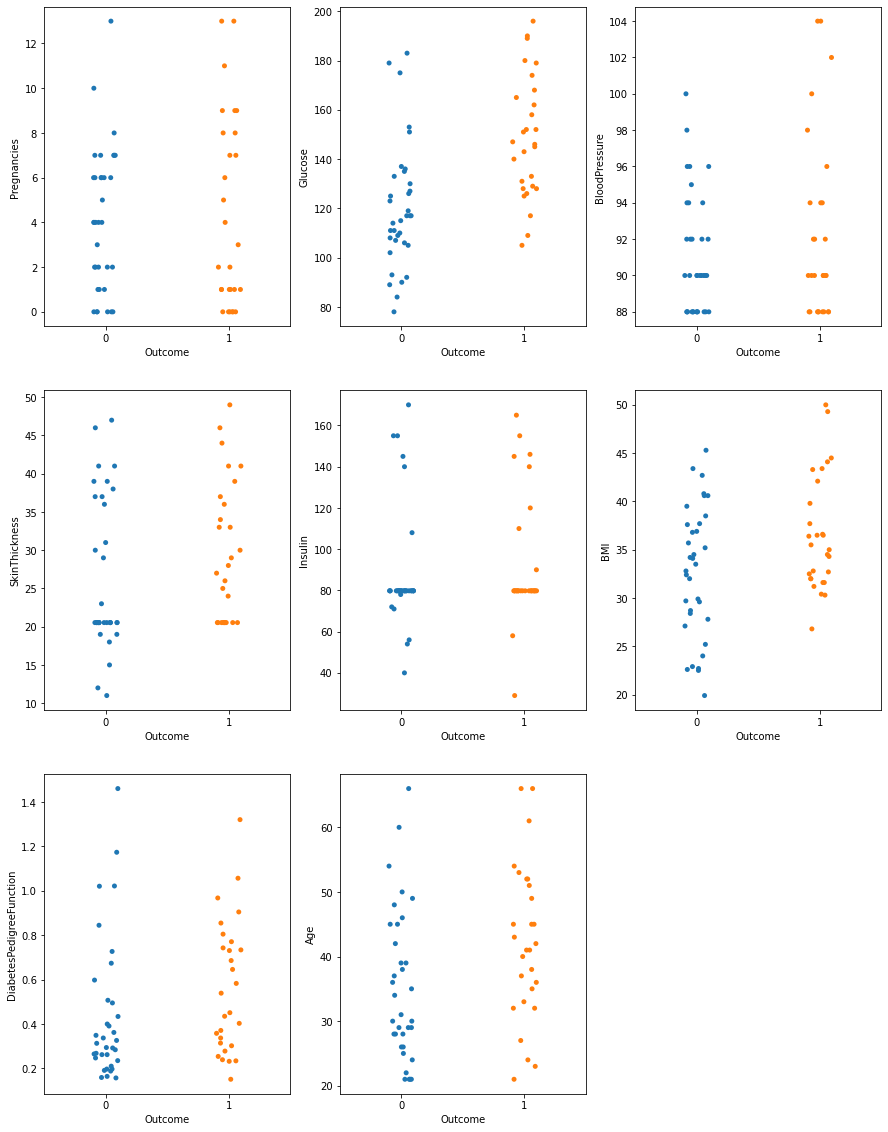

In [82]:
plt.figure(figsize=(15,20))
plotnumber = 1


for column in x:
    if plotnumber<= 9:   
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
        
        
        
    plotnumber+=1
     
        
plt.show()

In [83]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [84]:
x_scaled.shape[1]

8

In [85]:
#Finding variance inflation factorm in each scaled column  i.e x_scaled.shape[1] (1/1-R2)
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
#Lets check the values
vif

,vif,Features
0,1.196883,Pregnancies
1,1.144812,Glucose
2,1.048330,BloodPressure
3,1.431423,SkinThickness
4,1.067663,Insulin
5,1.405043,BMI
6,1.069415,DiabetesPedigreeFunction
7,1.338984,Age


In [ ]:
# All vif values are less than 5 which are very low. That means no multicollnearity.
#Now, we can go ahead with filling our data with model. Before that lets split out data into test and training set.


In [86]:
x_train,x_test,y_train,y_test =  train_test_split(x_scaled,y,test_size = 0.25, random_state =355)

In [87]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [88]:
y_pred = log_reg.predict(x_test)

In [89]:
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [90]:
#Model accuracy
accuracy = accuracy_score (y_test,y_pred)
accuracy

0.6875

In [91]:
# Confusion matrix 
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[8, 2],
       [3, 3]], dtype=int64)

In [92]:
from sklearn.metrics import classification_report

In [93]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.60      0.50      0.55         6

    accuracy                           0.69        16
   macro avg       0.66      0.65      0.65        16
weighted avg       0.68      0.69      0.68        16



In [96]:
# ROC curve
fpr,tpr,thresholds = roc_curve(y_test, y_pred)


In [98]:
print ('Thresholds = ', thresholds )
print('True Positve Rate =', tpr)
print('False Positive Rate =', fpr)


Thresholds =  [2 1 0]
True Positve Rate = [0.  0.5 1. ]
False Positive Rate = [0.  0.2 1. ]


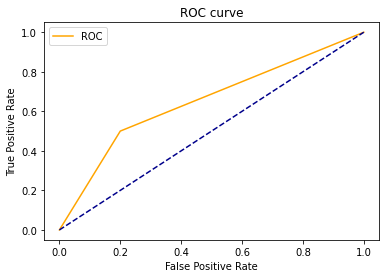

In [101]:
plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
plt.plot([0,1],[0,1], color = 'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [102]:
# How much area covering AUC
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6500000000000001
